# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# California housing prices - modeling
In this notebook we will:
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Exercises:
* please complete TODO parts


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [14]:
# Keras imports : model, layers, optimizers # Keras imports : model, layers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

In [15]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

In [16]:
X.shape, Y.shape

((20640, 8), (20640,))

Splitting data into training, validation and test sets:

In [17]:
valid_split = 0.2
test_split  = 0.1

# Calculate the split points
v_point = int(len(X) * (1 - valid_split - test_split))
t_point = int(len(X) * (1 - test_split))

# Split the data
X_train = X[:v_point]
Y_train = Y[:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [18]:
mean    = np.mean(X_train, axis = 0)
std     = np.std(X_train, axis = 0)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test  = (X_test - mean) / std

Model definition, hints:
* one or two hidden layers and 8-64 neurons / layer
* the hidden layers should have non-linear activation functions
* the input and output layers' sizes are defined by the data
* as the output is continuous, it can be a linear layer

In [20]:
# Define a simple Sequential model
model = Sequential()

# Add the first hidden layer with 64 neurons and a non-linear activation function (ReLU)
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add the second hidden layer with 32 neurons and a non-linear activation function (ReLU)
model.add(Dense(32, activation='relu'))

# Add the output layer with a single neuron (for regression problems) and a linear activation function
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Inspect the model summary:

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Number of trainable parameters in the model: TODO

Compiling the model, hints:
* the loss function has to match the task (regession)
* you should try ADAM and/or SGD optimizer

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

Defining the earlystopping callback function:

In [10]:
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
)

Train the model, use training and validation data and apply early stopping:

In [11]:
model.fit(X_train, Y_train,
                            validation_data=(X_valid,Y_valid),
                            batch_size=128,
                            epochs=100000,
                            verbose=1,
                            callbacks=[es])

Epoch 1/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5407 - val_loss: 1.3783
Epoch 2/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 0.6174 - val_loss: 0.9401
Epoch 3/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.4027 - val_loss: 0.7337
Epoch 4/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.3768 - val_loss: 0.6847
Epoch 5/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 0.3256 - val_loss: 0.6546
Epoch 6/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.3274 - val_loss: 0.6884
Epoch 7/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3256 - val_loss: 0.6307
Epoch 8/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3109 - val_loss: 0.6920
Epoch 9/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 0.2996 - val_loss: 0.7133
Epoch 10/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.2946 - val_loss: 0.6777
Epoch 11/100000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.2913 - val_l

Evaluate the model on the test data:

In [12]:
model.evaluate(X_test, Y_test)

 1/65 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3783

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.2537


0.2757309079170227

Run inference on the test data:

In [13]:
preds = model.predict(X_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step


Inspect the result on a regression plot:

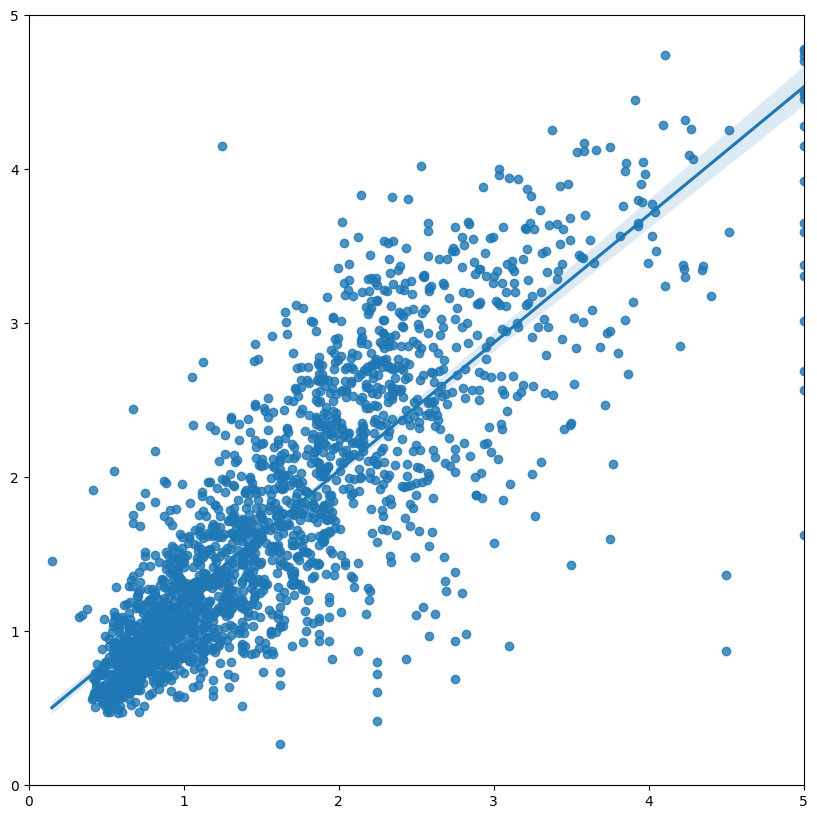

In [14]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5));